In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/store-model/store-sales-model.pickle
/kaggle/input/store-sales-time-series-forecasting/oil.csv
/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv
/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv
/kaggle/input/store-sales-time-series-forecasting/stores.csv
/kaggle/input/store-sales-time-series-forecasting/train.csv
/kaggle/input/store-sales-time-series-forecasting/test.csv
/kaggle/input/store-sales-time-series-forecasting/transactions.csv
/kaggle/input/final-submission/Last-Submission.csv
/kaggle/input/re-sub/re-submission.csv


In [3]:
#import libraries

import pandas as pd
import numpy as np

In [4]:
#reads a CSV file

df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/train.csv')
df.tail()

,id,date,store_nbr,family,sales,onpromotion
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8
3000887,3000887,2017-08-15,9,SEAFOOD,16.000,0


In [5]:
#remove duplicate rows

def duplicate (df):
    df.drop_duplicates(inplace=True)
    return df

In [6]:
#remove the "id" column

df = df.drop("id",axis=1)

In [7]:
#displays the first five rows

df.head()

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


In [8]:
#to remove missing or null values.

df = df.dropna()

In [9]:
#check the size of dataset

df.shape

(3000888, 5)

In [10]:
#Get 100 random samples

df.sample(100)

,date,store_nbr,family,sales,onpromotion
2432668,2016-09-30,16,CLEANING,613.000,26
988942,2014-07-10,7,SCHOOL AND OFFICE SUPPLIES,0.000,0
1132232,2014-09-29,28,BEAUTY,1.000,0
1618792,2015-06-30,3,EGGS,411.000,2
969970,2014-06-30,25,BABY CARE,0.000,0
...,...,...,...,...,...
2137533,2016-04-17,34,MEATS,53.894,0
353836,2013-07-18,37,EGGS,162.000,0
2834424,2017-05-14,38,LINGERIE,10.000,1
2207108,2016-05-26,37,BEAUTY,4.000,1


In [11]:
#import plotting library 

import matplotlib.pyplot as plt

In [12]:
import pandas as pd
import numpy as np

def remove_outliers(df, column_name, threshold):  #remove the specified column
   
    mean = df[column_name].mean()  #to calculate values in specified column
    std = df[column_name].std()  #to calculate standard deviation values in specified column
    
    lower_bound = mean - threshold * std  #to calculate the lower bound of the range of values considered non-outliers.
    upper_bound = mean + threshold * std  #to calculate the upper bound of the range of values considered non-outliers.
    
    df = df[(df[column_name] > lower_bound) & (df[column_name] < upper_bound)]
    return df  #return cleaned dataframe.

df= remove_outliers(df, 'sales',1.5)  #remove outliers of sales column and threshold 1.5 value
df.shape  #to size of the dataframe

(2854324, 5)

In [13]:
df= remove_outliers(df, 'onpromotion',1.5)  #remove outliers of onpromotion column and threshold 1.5 value
df.shape  #to size of the dataframe

(2761373, 5)

**Data Visualization**

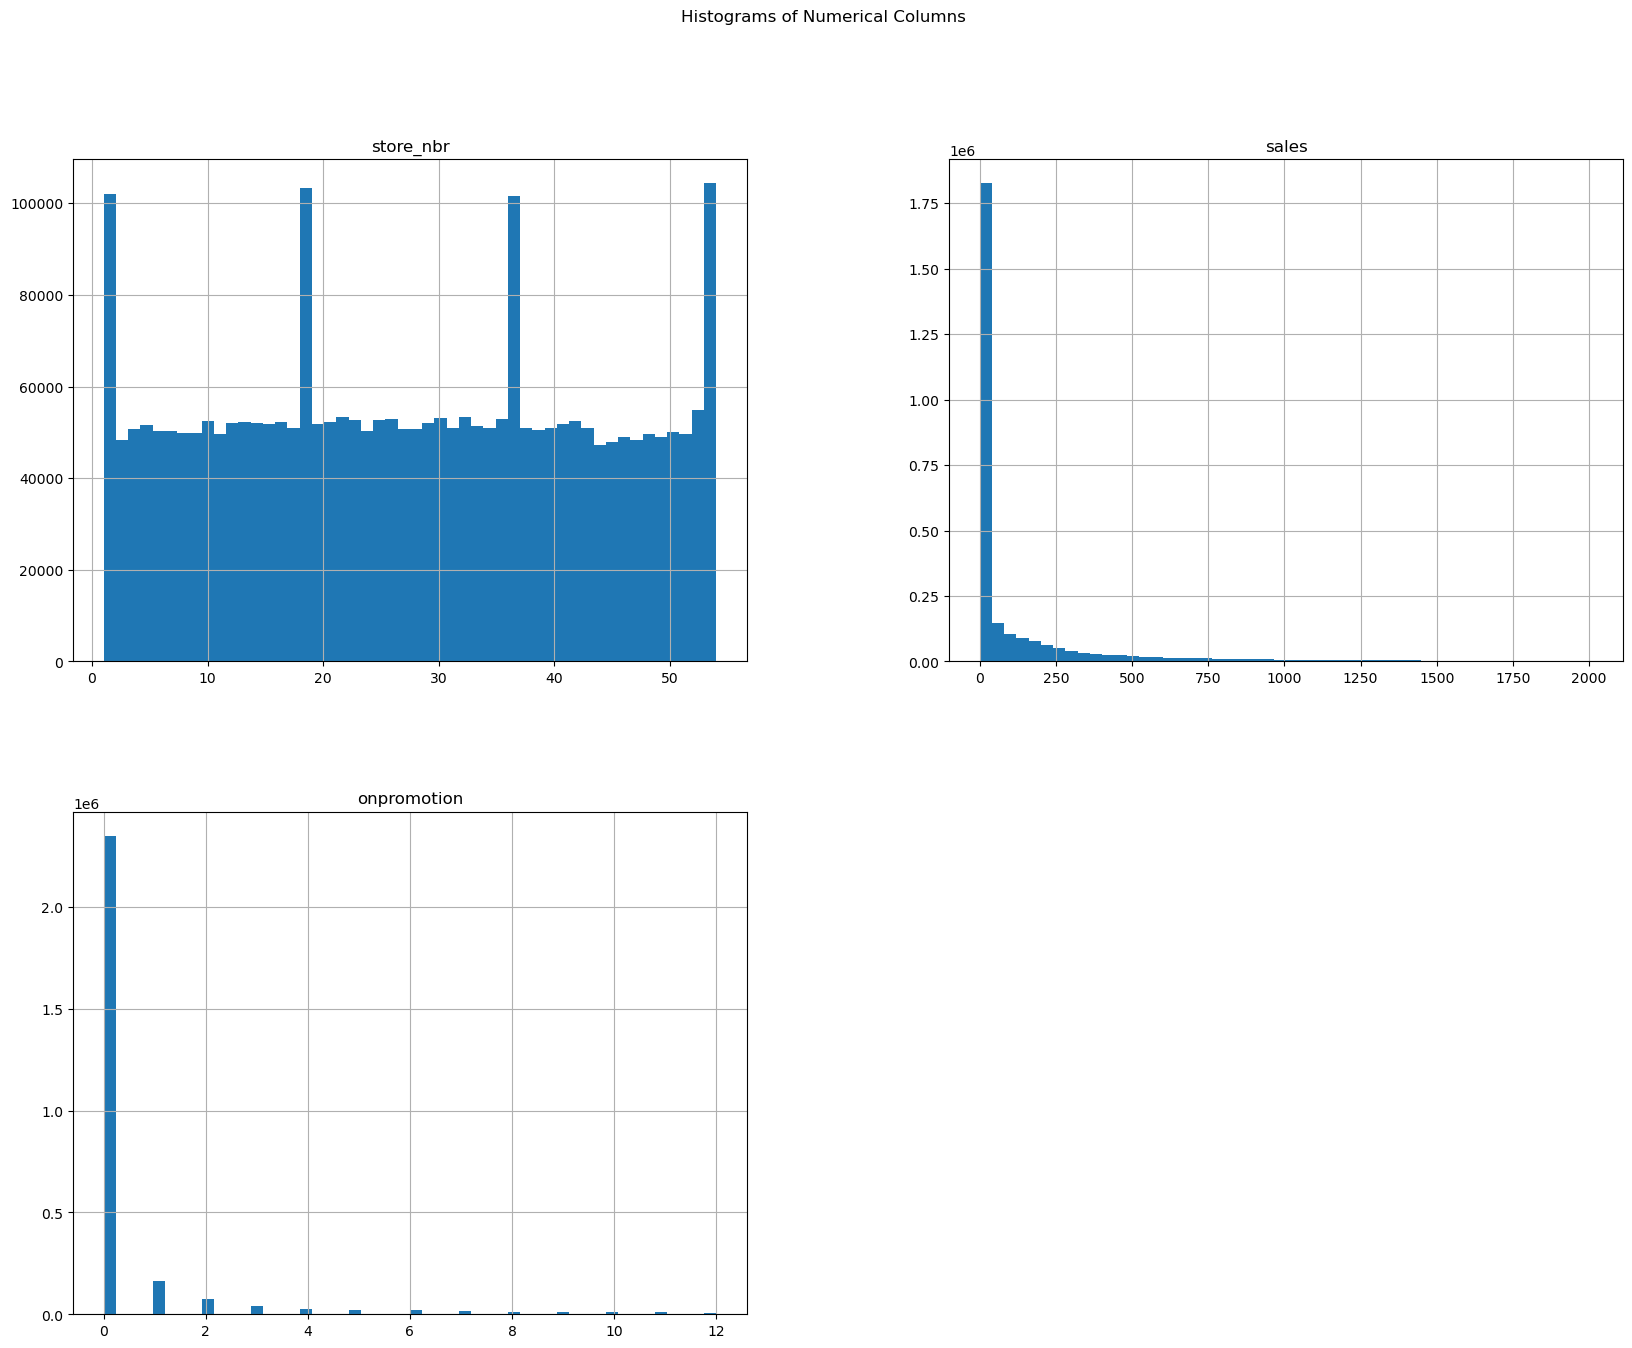

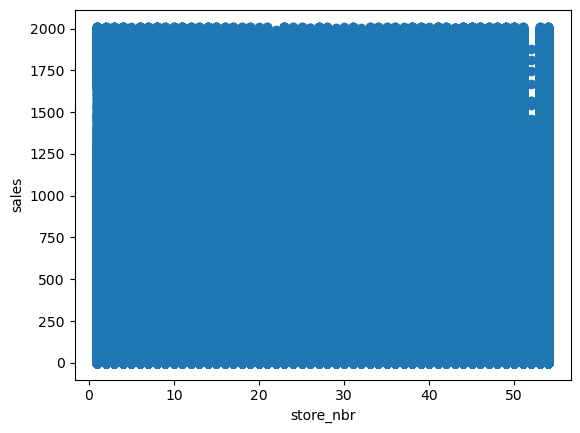

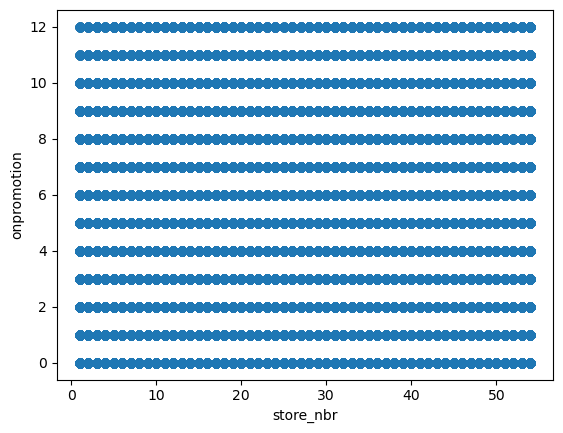

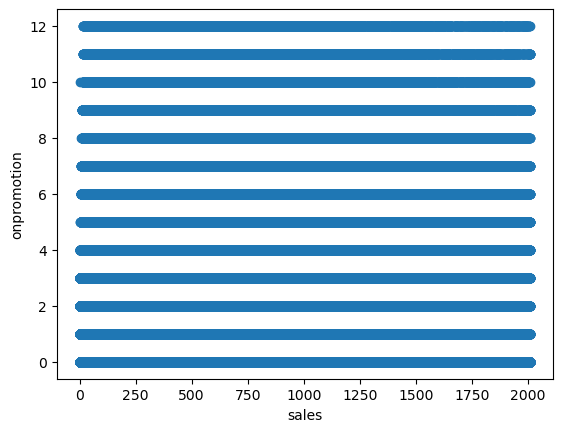

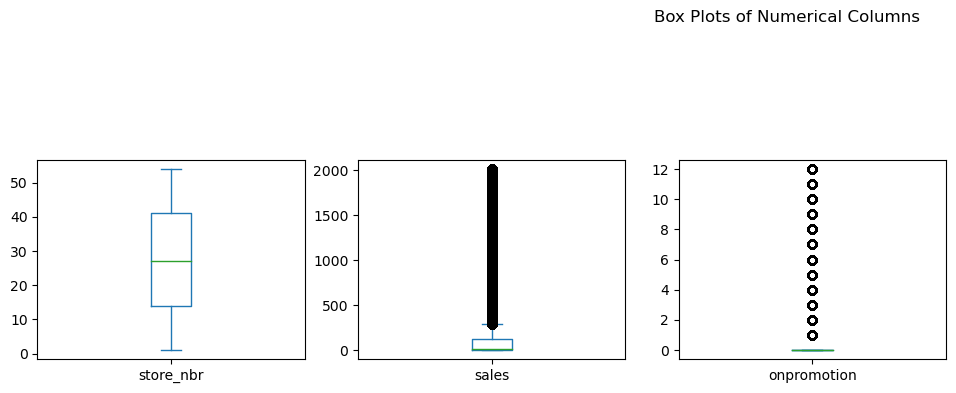

In [14]:
def visualize_data(data):     #To identify any potential outliers
    data_copy = data.copy()  #create new variable
    
    data_copy.hist(bins=50, figsize=(20, 15))
    plt.suptitle("Histograms of Numerical Columns")
    plt.show()    #Create a histogram plot for all numerical columns in DataFrame
        
    numerical_cols = data_copy.select_dtypes(include=['float64', 'int64']).columns
    for i in range(len(numerical_cols)):
        for j in range(i+1, len(numerical_cols)):
            plt.scatter(data_copy[numerical_cols[i]], data_copy[numerical_cols[j]])
            plt.xlabel(numerical_cols[i])  #set the labels for the x-axis
            plt.ylabel(numerical_cols[j])  #set the labels for the y-axis
            plt.show()   #to visually explore numerical columns in a dataset
            
    data_copy.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(20,15))
    plt.suptitle("Box Plots of Numerical Columns")
    plt.show()
visualize_data(df)  #To display the plot

**Feature Engineering**

In [15]:
df.head()  #to show first n rows of DataFrame

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


In [16]:
def split_date_column(df, column_name):  #split date column to year and month

    df['year'] = pd.DatetimeIndex(df[column_name]).year
    df['month'] = pd.DatetimeIndex(df[column_name]).month

    return df  #convert the date column to datetime object and extract to year and month

df_split = split_date_column(df, 'date')

In [17]:
def convert_to_categorical(df, column_name):  #data categorising

    if df[column_name].dtype in ['int64', 'float64']:   #check the data type
        df[column_name] = df[column_name].astype('category')  #convert the data types
    else:
        print(f"Column '{column_name}' is not of type int or float. No conversion necessary.")
    
    return df
df = convert_to_categorical(df, 'year')
df = convert_to_categorical(df, 'month')  #convert into numarical variables into categorical variables

In [18]:
df.head() #to show first n rows of DataFrame

,date,store_nbr,family,sales,onpromotion,year,month
0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1
1,2013-01-01,1,BABY CARE,0.0,0,2013,1
2,2013-01-01,1,BEAUTY,0.0,0,2013,1
3,2013-01-01,1,BEVERAGES,0.0,0,2013,1
4,2013-01-01,1,BOOKS,0.0,0,2013,1


In [19]:
df = df.drop("date",axis=1)  #drop date column

In [20]:
df.head()  #to show first n rows of DataFrame

,store_nbr,family,sales,onpromotion,year,month
0,1,AUTOMOTIVE,0.0,0,2013,1
1,1,BABY CARE,0.0,0,2013,1
2,1,BEAUTY,0.0,0,2013,1
3,1,BEVERAGES,0.0,0,2013,1
4,1,BOOKS,0.0,0,2013,1


In [21]:
df = pd.get_dummies(df)   #to convert the categorical variables into dummy variables.

In [22]:
y_train = df['sales']  #target variable
X_train = df.drop("sales",axis=1)  #predictor variable

In [23]:
df.head()  #to show DataFrame

,store_nbr,sales,onpromotion,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1,0.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
from sklearn.model_selection import train_test_split  #to split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

#0.2 is 20% of data should be used for testing / random number generator

In [25]:
dft = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/test.csv')

In [26]:
def split_date_column(df, column_name):

    df['year'] = pd.DatetimeIndex(df[column_name]).year
    df['month'] = pd.DatetimeIndex(df[column_name]).month
    df['day'] = pd.DatetimeIndex(df[column_name]).day

    return df
dft = split_date_column(dft, 'date') #split the date in to year, month, day

In [27]:
def convert_to_categorical(df, column_name):

    if df[column_name].dtype in ['int64', 'float64']:  #check the data types
        df[column_name] = df[column_name].astype('category')  #convert the data types
    else:
        print(f"Column '{column_name}' is not of type int or float. No conversion necessary.")
    
    return df
dft = convert_to_categorical(dft, 'year')
dft = convert_to_categorical(dft, 'month')
dft = convert_to_categorical(dft, 'store_nbr')  #convert into categorical variables

In [28]:
dft.head() #to show DataFrame

,id,date,store_nbr,family,onpromotion,year,month,day
0,3000888,2017-08-16,1,AUTOMOTIVE,0,2017,8,16
1,3000889,2017-08-16,1,BABY CARE,0,2017,8,16
2,3000890,2017-08-16,1,BEAUTY,2,2017,8,16
3,3000891,2017-08-16,1,BEVERAGES,20,2017,8,16
4,3000892,2017-08-16,1,BOOKS,0,2017,8,16


In [29]:
dft = dft.drop("date",axis=1)  #drop the date coloum

In [30]:
dft = dft.drop("day",axis=1)  #drip the day coloum

In [31]:
dft.head()  #to show DataFrame

,id,store_nbr,family,onpromotion,year,month
0,3000888,1,AUTOMOTIVE,0,2017,8
1,3000889,1,BABY CARE,0,2017,8
2,3000890,1,BEAUTY,2,2017,8
3,3000891,1,BEVERAGES,20,2017,8
4,3000892,1,BOOKS,0,2017,8


In [32]:
dft = pd.get_dummies(dft)  #to convert the categorical variables into dummy variables.

**Model Traing**

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split  #to split the dataset into training set and testing set
from sklearn.ensemble import RandomForestRegressor

#libraries to build a Random Forest Regression model

def build_top_10_models(y, X):
    models = []
    
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)
    models.append(('Random Forest Regression', rf))
       
    return models

In [34]:
models = build_top_10_models(y_train, X_train)  #train the model

In [35]:
from sklearn.metrics import mean_absolute_error

def test_models(models, X_test, y_test):   #test the model
    results = []
    for name, model in models:
        y_pred = model.predict(X_test)
        accuracy = mean_absolute_error(y_test, y_pred)
        results.append((name, accuracy))
    
    results.sort(key=lambda x: x[1], reverse=False)
    
    print("{:<35} {:<15}".format("Model", "Accuracy"))
    print("--------------------------")
    for result in results:
        print("{:<35} {:<15}".format(result[0], result[1]))

In [36]:
test_models(models, X_test, y_test)  #test the model

Model                               Accuracy       
--------------------------
Random Forest Regression            32.951512735281106


In [37]:
import pickle
with open('store-sales-model.pickle',"wb") as file: pickle.dump(models[0],file)

**Test Model**

In [38]:
dft = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/test.csv')
dft.tail()

,id,date,store_nbr,family,onpromotion
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9
28511,3029399,2017-08-31,9,SEAFOOD,0


In [39]:
dft = dft.drop("id",axis=1)

In [40]:
def split_date_column(dft, column_name):
   
    dft['year'] = pd.DatetimeIndex(dft[column_name]).year
    dft['month'] = pd.DatetimeIndex(dft[column_name]).month

    return dft
dft_split = split_date_column(dft, 'date')

In [41]:
def convert_to_categorical(dft, column_name):
    
    if dft[column_name].dtype in ['int64', 'float64']:  #chechk the data types
        dft[column_name] = dft[column_name].astype('category')  #convert the data types
    else:
        print(f"Column '{column_name}' is not of type int or float. No conversion necessary.")
    
    return dft
dft = convert_to_categorical(dft, 'year')
dft = convert_to_categorical(dft, 'month')

In [42]:
dft = pd.get_dummies(dft)

In [44]:
dft = dft.drop("date_2017-08-31",axis=1) 

In [45]:
import pickle

with open("/kaggle/input/store-model/store-sales-model.pickle", "rb") as file:  #read only
    model = pickle.load(file)

In [46]:
#make a prediction using model and dftrain

def make_prediction(model, dftrain):
    predictions = model[1].predict(dftrain)
    return predictions

In [47]:
dfp = pd.DataFrame(make_prediction(model, dft))

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- date_2017-08-16
- date_2017-08-17
- date_2017-08-18
- date_2017-08-19
- date_2017-08-20
- ...
Feature names seen at fit time, yet now missing:
- month_1
- month_10
- month_11
- month_12
- month_2
- ...

  warnings.warn(message, FutureWarning)


In [48]:
dfp.to_csv('submission.csv')

In [49]:
example = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv')
example.tail()

,id,sales
28507,3029395,0.0
28508,3029396,0.0
28509,3029397,0.0
28510,3029398,0.0
28511,3029399,0.0


In [50]:
example.to_csv('sample_id.csv')

In [51]:
example.drop("sales",axis=1)

,id
0,3000888
1,3000889
2,3000890
3,3000891
4,3000892
...,...
28507,3029395
28508,3029396
28509,3029397
28510,3029398


In [52]:
resubmission = pd.read_csv('/kaggle/input/re-sub/re-submission.csv')
resubmission.tail()

,sales
28507,7.370471
28508,0.199961
28509,7.311438
28510,109.991550
28511,0.166554


In [53]:
example.to_csv('final_sample_id.csv')

In [54]:
resubmission.to_csv('final_submission_sales.csv')

In [55]:
lastsubmission = pd.read_csv('/kaggle/input/final-submission/Last-Submission.csv')

In [56]:
lastsubmission.to_csv('Last_Submission.csv', index=False)

In [57]:
lastsubmission.head

<bound method NDFrame.head of             id       sales
0      3000888   21.810680
1      3000889   13.141314
2      3000890    8.176497
3      3000891  190.274524
4      3000892   16.420193
...        ...         ...
28507  3029395    7.370471
28508  3029396    0.199961
28509  3029397    7.311438
28510  3029398  109.991550
28511  3029399    0.166554

[28512 rows x 2 columns]>